In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 4.8 MB/s 
     |████████████████████████████████| 5.3 MB 29.5 MB/s 
     |████████████████████████████████| 1.3 MB 57.1 MB/s 
     |████████████████████████████████| 163 kB 34.5 MB/s 
     |████████████████████████████████| 7.6 MB 30.4 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=63d7fb8ccbc7bd1c5365c7f03b5d6b7f598337e7d7affd8981dba9f9ee273739
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


In [3]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('sentence-transformers/LaBSE')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/114 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.62k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/804 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.62M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/411 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.22M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/461 [00:00<?, ?B/s]

In [4]:
from sklearn.metrics.pairwise import cosine_similarity

In [5]:
def save_feather(df, path="dummy.feather"):
    df = df.reset_index()
    df.to_feather(path)


def load_feather(path="dummy.feather"):
    df = pd.read_feather(path)
    df.set_index("index", inplace=True)
    df.index.name = None
    return df

In [8]:
%%time
df_vec_labse = load_feather('/content/drive/MyDrive/123/df_vec_labse.feather')

CPU times: user 2.72 s, sys: 5.17 s, total: 7.88 s
Wall time: 1min 4s


In [9]:
df_vec_labse

,name_1,name_2,is_duplicate,name_1_vec,name_2_vec
1,Iko Industries Ltd.,"Enormous Industrial Trade Pvt., Ltd.",0,"[[0.010844302, -0.082226455, -0.04189791, -0.0...","[[0.021989493, -0.024475524, -0.006609006, 0.0..."
2,Apcotex Industries Ltd.,Technocraft Industries (India) Ltd.,0,"[[-0.01656311, -0.07479388, -0.0007417748, 0.0...","[[0.025520165, -0.07653831, 0.0019876997, -0.0..."
3,"Rishichem Distributors Pvt., Ltd.",Dsa,0,"[[-0.018345688, -0.0012693725, -0.037742913, 0...","[[-0.0043337736, -0.006696353, -0.023496298, 0..."
4,Powermax Rubber Factory,Co. One,0,"[[-0.037510347, -0.00525507, 0.026755402, 0.05...","[[-0.021238245, -0.037609607, -0.06640513, -0...."
5,Tress A/S,Longyou Industries Park Zhejiang,0,"[[0.0037779491, -0.06263389, -0.020174284, -0....","[[0.019784903, -0.04415012, 0.066388965, 0.005..."
...,...,...,...,...,...
497815,BIT-MAT PRODUCTS,The Goodyear Tire and Rubber Company,0,"[[-0.02369776, -0.052506827, 0.022398805, 0.01...","[[-0.03186975, -0.06621775, 0.020546386, 0.003..."
497816,"Bnd Trading Co., Ltd.",Zhong Shan Yue Liang Economy& Trade Imp. & Exp...,0,"[[-0.03783608, -0.019618832, -0.015711052, 0.0...","[[-0.0129716555, -0.052715443, -0.027191546, -..."
497817,"Xeikon Industrial Co., Ltd. Of Dongguan City","Yi Cheng Trading Co., Ltd. Of Dongguan City",0,"[[0.039503466, -0.076789334, 0.014192865, -0.0...","[[-0.001996329, -0.05425315, 0.012403834, -0.0..."
497818,"Shanghai Kechuan Trading Co., Ltd.",Shanghai M&G Stationery Inc.,0,"[[-0.04507668, -0.022764595, -0.047456298, -0....","[[-0.010439436, -0.026514377, 0.004609318, -0...."


In [10]:
df_vec_labse.shape[0]

497819

In [11]:
res_list = []
for index in tqdm(range(df_vec_labse.shape[0])):
    res_list.append(cosine_similarity(df_vec_labse['name_1_vec'].iloc[index][0].reshape(1, -1), df_vec_labse['name_2_vec'].iloc[index][0].reshape(1, -1)))

100%|██████████| 497819/497819 [02:15<00:00, 3672.33it/s]


In [12]:
df_vec_labse['cosine_similarity'] = res_list

In [13]:
len(res_list)

497819

In [14]:
np.mean(res_list)

0.34928107

In [15]:
df_vec_labse[df_vec_labse['is_duplicate']==1]['cosine_similarity'].mean()

array([[0.62228155]], dtype=float32)

In [16]:
df_vec_labse[df_vec_labse['is_duplicate']==0]['cosine_similarity'].mean()

array([[0.3472563]], dtype=float32)

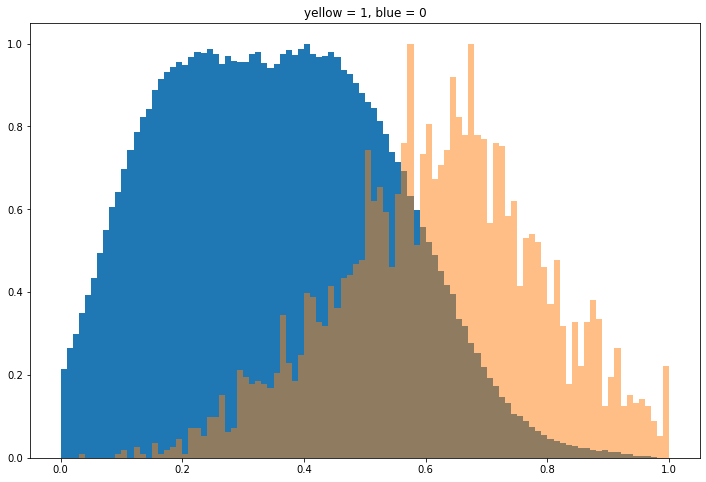

In [17]:
dist1 = df_vec_labse[df_vec_labse['is_duplicate']==0]['cosine_similarity']
dist2 = df_vec_labse[df_vec_labse['is_duplicate']==1]['cosine_similarity']

##computing the bin properties (same for both distributions)
num_bin = 100
bin_lims = np.linspace(0, 1, num_bin+1)
bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
bin_widths = bin_lims[1:]-bin_lims[:-1]

##computing the histograms
hist1, _ = np.histogram(dist1, bins=bin_lims)
hist2, _ = np.histogram(dist2, bins=bin_lims)

##normalizing
hist1b = hist1/np.max(hist1)
hist2b = hist2/np.max(hist2)

fig, (ax) = plt.subplots()
fig.set_size_inches(12, 8)

ax.bar(bin_centers, hist1b, width = bin_widths, align = 'center')
ax.bar(bin_centers, hist2b, width = bin_widths, align = 'center', alpha = 0.5)
ax.set_title('yellow = 1, blue = 0')

plt.show()